In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from utils import sigmoid

In [16]:
freq_colors = plt.get_cmap('BuPu', 10)

/home/bonaiuto/miniconda3/envs/lhc/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/bonaiuto/lagged_hilbert_coherence/python/utils.py:33: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


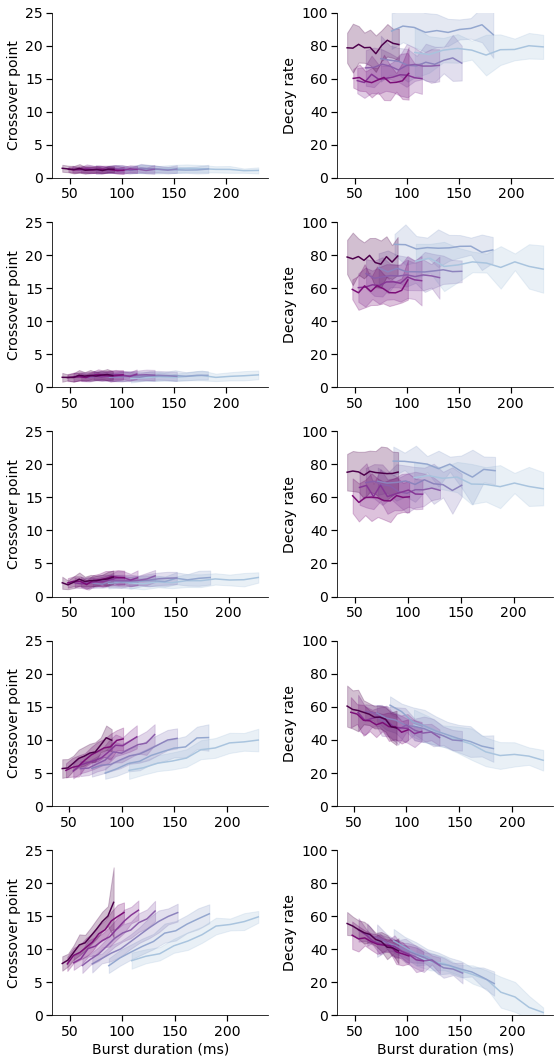

In [17]:
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

x0_lim=[0,25]
k_lim=[0,100]

f=np.load('../output/sims/burst_dur/sim_results.npz')
freqs=f['freqs']
snrs=f['snrs']

fig=plt.figure(figsize=(8,3*len(snrs)))
    
for snr_idx, snr in enumerate(snrs):
    lcs_classic=f['lfc'][snr_idx,:,:,:,:]
    lcs_hilbert=f['lhc'][snr_idx,:,:,:,:]
    psds=f['psds'][snr_idx,:,:,:]
    brst_d=f['brst_d'][snr_idx,:,:]*1000
    brst_n=f['brst_n'][snr_idx,:,:]
    lags=f['lags']
    brst_f=f['brst_f']

    n_trials=lcs_classic.shape[1]

    ax1=plt.subplot(len(snrs),2,snr_idx*2+1)
    ax2=plt.subplot(len(snrs),2,snr_idx*2+2)
    
    for f_idx in range(len(brst_f)):
        freq=brst_f[f_idx]
        lc_f_idx=np.argmin(np.abs(freqs-freq))

        d_bursts=[]
        x0s_hilbert=[]
        ks_hilbert=[]
        for i in range(n_trials):
            lc_hilbert = lcs_hilbert[f_idx,i,:,:]
            d_bursts.append(brst_d[f_idx,i])

            b_lc_hilbert=lc_hilbert[lc_f_idx,:]
            p0 = [np.median(lags),3]
            popt, pcov = curve_fit(sigmoid, lags, b_lc_hilbert, p0, method='lm',maxfev=100000)
            x0s_hilbert.append(popt[0])
            ks_hilbert.append(popt[1])
        d_bursts=np.array(d_bursts)
        
        x0s_hilbert=np.array(x0s_hilbert)
        ks_hilbert=np.array(ks_hilbert)

        d_bin_edges = np.linspace(np.percentile(d_bursts,5), np.percentile(d_bursts,95), 11)
        d_bin_indices = np.digitize(d_bursts, d_bin_edges)
        d_mean_x0s_hilbert = np.array([np.mean(np.array(x0s_hilbert)[d_bin_indices == i]) for i in range(1, len(d_bin_edges))])
        d_std_x0s_hilbert = np.array([np.std(np.array(x0s_hilbert)[d_bin_indices == i]) for i in range(1, len(d_bin_edges))])                
        d_mean_ks_hilbert = np.array([np.mean(np.array(ks_hilbert)[d_bin_indices == i]) for i in range(1, len(d_bin_edges))])
        d_std_ks_hilbert = np.array([np.std(np.array(ks_hilbert)[d_bin_indices == i]) for i in range(1, len(d_bin_edges))])

        ax1.plot(d_bin_edges[:-1],d_mean_x0s_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
        ax1.fill_between(d_bin_edges[:-1],
                         d_mean_x0s_hilbert-d_std_x0s_hilbert, 
                         d_mean_x0s_hilbert+d_std_x0s_hilbert, 
                         alpha=0.25, color=freq_colors(f_idx+3))        
        ax2.plot(d_bin_edges[:-1],d_mean_ks_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
        ax2.fill_between(d_bin_edges[:-1],
                         d_mean_ks_hilbert-d_std_ks_hilbert, 
                         d_mean_ks_hilbert+d_std_ks_hilbert, 
                         alpha=0.25, color=freq_colors(f_idx+3))
    ax1.set_ylim(x0_lim)
    ax2.set_ylim(k_lim)

    ax1.set_ylabel('Crossover point')
    ax2.set_ylabel('Decay rate')
ax1.set_xlabel('Burst duration (ms)')
ax2.set_xlabel('Burst duration (ms)')
plt.tight_layout()
fig.savefig('../output/figures/figure_s4.pdf')

/home/bonaiuto/miniconda3/envs/lhc/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/bonaiuto/lagged_hilbert_coherence/python/utils.py:33: RuntimeWarning: overflow encountered in exp
  y = L / (1 + np.exp(-k*(x-x0))) + b


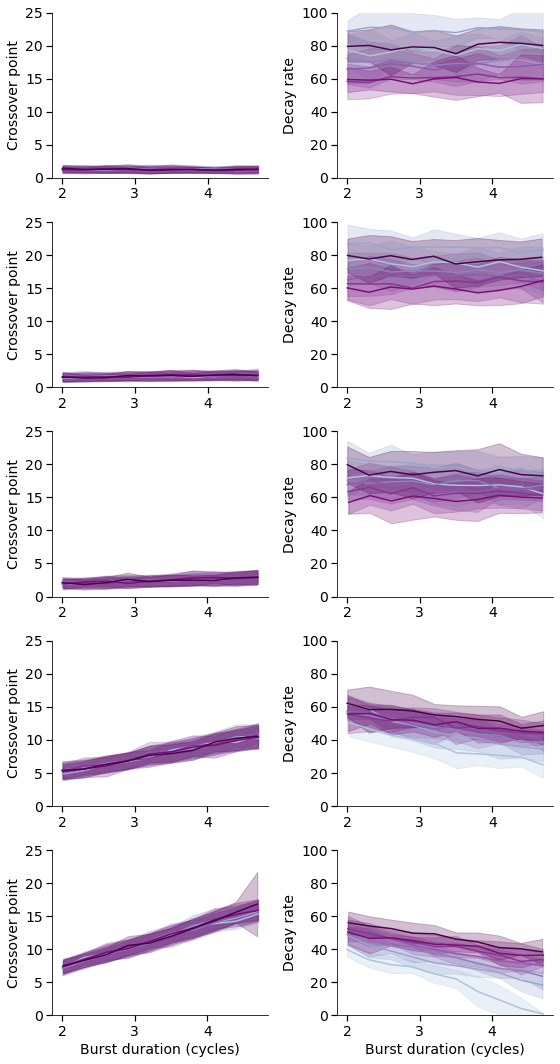

In [18]:
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

x0_lim=[0,25]
k_lim=[0,100]

f=np.load('../output/sims/burst_dur/sim_results.npz')
freqs=f['freqs']
snrs=f['snrs']

fig=plt.figure(figsize=(8,3*len(snrs)))

for snr_idx, snr in enumerate(snrs):
    lcs_classic=f['lfc'][snr_idx,:,:,:,:]
    lcs_hilbert=f['lhc'][snr_idx,:,:,:,:]
    psds=f['psds'][snr_idx,:,:,:]
    brst_d_c=f['brst_d_c'][snr_idx,:,:]
    brst_n=f['brst_n'][snr_idx,:,:]
    lags=f['lags']
    brst_f=f['brst_f']

    n_trials=lcs_classic.shape[1]

    ax1=plt.subplot(len(snrs),2,snr_idx*2+1)
    ax2=plt.subplot(len(snrs),2,snr_idx*2+2)
    
    for f_idx in range(len(brst_f)):
        freq=brst_f[f_idx]
        lc_f_idx=np.argmin(np.abs(freqs-freq))

        d_c_bursts=[]
        x0s_hilbert=[]
        ks_hilbert=[]
        for i in range(n_trials):
            lc_hilbert = lcs_hilbert[f_idx,i,:,:]
            d_c_bursts.append(brst_d_c[f_idx,i])

            b_lc_hilbert=lc_hilbert[lc_f_idx,:]
            p0 = [np.median(lags),3]
            popt, pcov = curve_fit(sigmoid, lags, b_lc_hilbert, p0, method='lm',maxfev=100000)
            x0s_hilbert.append(popt[0])
            ks_hilbert.append(popt[1])
        d_c_bursts=np.array(d_c_bursts)

        x0s_hilbert=np.array(x0s_hilbert)
        ks_hilbert=np.array(ks_hilbert)

        d_c_bin_edges = np.linspace(np.min(d_c_bursts), np.max(d_c_bursts), 11)
        d_c_bin_indices = np.digitize(d_c_bursts, d_c_bin_edges)
        d_c_mean_x0s_hilbert = np.array([np.nanmean(np.array(x0s_hilbert)[d_c_bin_indices == i]) for i in range(1, len(d_c_bin_edges))])
        d_c_std_x0s_hilbert = np.array([np.nanstd(np.array(x0s_hilbert)[d_c_bin_indices == i]) for i in range(1, len(d_c_bin_edges))])        
        d_c_mean_ks_hilbert = np.array([np.nanmean(np.array(ks_hilbert)[d_c_bin_indices == i]) for i in range(1, len(d_c_bin_edges))])
        d_c_std_ks_hilbert = np.array([np.nanstd(np.array(ks_hilbert)[d_c_bin_indices == i]) for i in range(1, len(d_c_bin_edges))])

        ax1.plot(d_c_bin_edges[:-1],d_c_mean_x0s_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
        ax1.fill_between(d_c_bin_edges[:-1],
                         d_c_mean_x0s_hilbert-d_c_std_x0s_hilbert, 
                         d_c_mean_x0s_hilbert+d_c_std_x0s_hilbert, 
                         alpha=0.25, color=freq_colors(f_idx+3))
        ax2.plot(d_c_bin_edges[:-1],d_c_mean_ks_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
        ax2.fill_between(d_c_bin_edges[:-1],
                         d_c_mean_ks_hilbert-d_c_std_ks_hilbert, 
                         d_c_mean_ks_hilbert+d_c_std_ks_hilbert, 
                         alpha=0.25, color=freq_colors(f_idx+3))
        
        x0_slope=(d_c_mean_x0s_hilbert[-1]-d_c_mean_x0s_hilbert[0])/(d_c_bin_edges[-2]-d_c_bin_edges[0])
        k_slope=(d_c_mean_ks_hilbert[-1]-d_c_mean_ks_hilbert[0])/(d_c_bin_edges[-2]-d_c_bin_edges[0])
    ax1.set_ylim(x0_lim)
    ax2.set_ylim(k_lim)
    ax1.set_ylabel('Crossover point')
    ax2.set_ylabel('Decay rate')
ax1.set_xlabel('Burst duration (cycles)')
ax2.set_xlabel('Burst duration (cycles)')
plt.tight_layout()
fig.savefig('../output/figures/figure_s5.pdf')

/home/bonaiuto/miniconda3/envs/lhc/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


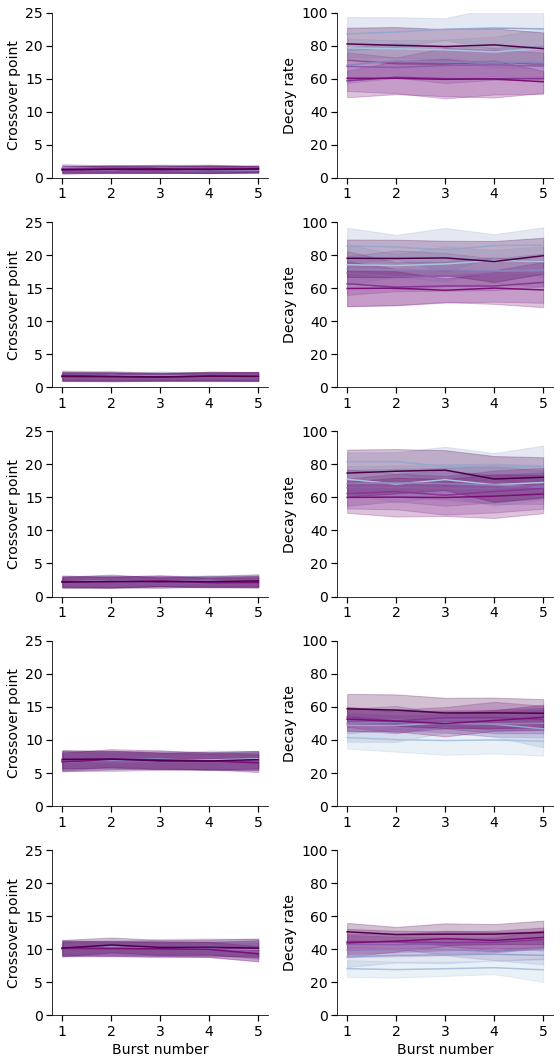

In [19]:
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

x0_lim=[0,25]
k_lim=[0,100]

f=np.load('../output/sims/burst_num/sim_results.npz')
freqs=f['freqs']
snrs=f['snrs']

fig=plt.figure(figsize=(8,3*len(snrs)))

for snr_idx, snr in enumerate(snrs):
    
    lcs_classic=f['lfc'][snr_idx,:,:,:,:]
    lcs_hilbert=f['lhc'][snr_idx,:,:,:,:]
    psds=f['psds'][snr_idx,:,:,:]
    brst_n=f['brst_n'][snr_idx,:,:]
    lags=f['lags']
    brst_f=f['brst_f']

    n_trials=lcs_classic.shape[1]

    ax1=plt.subplot(len(snrs),2,snr_idx*2+1)
    ax2=plt.subplot(len(snrs),2,snr_idx*2+2)
    
    for f_idx in range(len(brst_f)):
        freq=brst_f[f_idx]
        lc_f_idx=np.argmin(np.abs(freqs-freq))

        n_bursts=[]
        x0s_hilbert=[]
        ks_hilbert=[]
        for i in range(n_trials):
            lc_hilbert = lcs_hilbert[f_idx,i,:,:]
            n_bursts.append(brst_n[f_idx,i])

            b_lc_hilbert=lc_hilbert[lc_f_idx,:]
            p0 = [np.median(lags),3]
            popt, pcov = curve_fit(sigmoid, lags, b_lc_hilbert, p0, method='lm',maxfev=100000)
            x0s_hilbert.append(popt[0])
            ks_hilbert.append(popt[1])
        n_bursts=np.array(n_bursts)

        ks_hilbert=np.array(ks_hilbert)

        n_bin_edges = np.arange(1,7)
        n_bin_indices = np.digitize(n_bursts, n_bin_edges)
        n_mean_x0s_hilbert = np.array([np.mean(np.array(x0s_hilbert)[n_bin_indices == i]) for i in range(1, len(n_bin_edges))])
        n_std_x0s_hilbert = np.array([np.std(np.array(x0s_hilbert)[n_bin_indices == i]) for i in range(1, len(n_bin_edges))])        

        n_bin_edges = np.arange(1,7)
        n_bin_indices = np.digitize(n_bursts, n_bin_edges)
        n_mean_ks_hilbert = np.array([np.mean(np.array(ks_hilbert)[n_bin_indices == i]) for i in range(1, len(n_bin_edges))])
        n_std_ks_hilbert = np.array([np.std(np.array(ks_hilbert)[n_bin_indices == i]) for i in range(1, len(n_bin_edges))])

        ax1.plot(n_bin_edges[:-1],n_mean_x0s_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
        ax1.fill_between(n_bin_edges[:-1],
                          n_mean_x0s_hilbert-n_std_x0s_hilbert, 
                          n_mean_x0s_hilbert+n_std_x0s_hilbert, 
                          alpha=0.25, color=freq_colors(f_idx+3))
        ax2.plot(n_bin_edges[:-1],n_mean_ks_hilbert, label='{} Hz'.format(f), color=freq_colors(f_idx+3))
        ax2.fill_between(n_bin_edges[:-1],
                          n_mean_ks_hilbert-n_std_ks_hilbert, 
                          n_mean_ks_hilbert+n_std_ks_hilbert, 
                          alpha=0.25, color=freq_colors(f_idx+3))
        x0_slope=(n_mean_x0s_hilbert[-1]-n_mean_x0s_hilbert[0])/(n_bin_edges[-2]-n_bin_edges[0])
        k_slope=(n_mean_ks_hilbert[-1]-n_mean_ks_hilbert[0])/(n_bin_edges[-2]-n_bin_edges[0])

    ax1.set_ylim(x0_lim)
    ax2.set_ylim(k_lim)
    ax1.set_ylabel('Crossover point')
    ax2.set_ylabel('Decay rate')

ax1.set_xlabel('Burst number')
ax2.set_xlabel('Burst number')
plt.tight_layout()
fig.savefig('../output/figures/figure_s6.pdf')